## Examen Final - Python Fundamentals for Data Science
Instrucciones:
* El examen tiene un máximo de 3 horas de duración
* Cada pregunta vale 2 puntos para un máximo de 20
* Se permite hacer consultas por internet
* Las respuestas incluyendo código deben verse reflejadas en el notebook
* Enviar el notebook con respuestas al correo del instructor al terminar
* No se permite consultar ni conversar con los compañeros de clase

P1. Cargar el dataset datos.csv en Pandas. 
Mostrar las filas iniciales en la pantalla. Cuantas filas y columnas hay

In [1]:
#P1_SOL
%matplotlib inline
import pandas as pd
data = pd.read_csv('datos.csv')
print(data.head())
print(data.shape)

   Unnamed: 0  age         workclass  fnlwgt  education  education-num  \
0           0   50  Self-emp-not-inc   83311  Bachelors             13   
1           1   38           Private  215646    HS-grad              9   
2           2   53           Private  234721       11th              7   
3           3   28           Private  338409  Bachelors             13   
4           4   37           Private  284582    Masters             14   

       marital-status         occupation   relationship   race     sex  \
0  Married-civ-spouse    Exec-managerial        Husband  White    Male   
1            Divorced  Handlers-cleaners  Not-in-family  White    Male   
2  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
3  Married-civ-spouse     Prof-specialty           Wife  Black  Female   
4  Married-civ-spouse    Exec-managerial           Wife  White  Female   

   capital-gain  capital-loss  hours-per-week native-country salary  
0             0             0           

P2. Existe una columna que copia el índice. Eliminarla del dataframe y mostrar el resultado.

In [2]:
#P2_SOL
#data = data.drop(columns='Unnamed: 0')
print(data.head())

   Unnamed: 0  age         workclass  fnlwgt  education  education-num  \
0           0   50  Self-emp-not-inc   83311  Bachelors             13   
1           1   38           Private  215646    HS-grad              9   
2           2   53           Private  234721       11th              7   
3           3   28           Private  338409  Bachelors             13   
4           4   37           Private  284582    Masters             14   

       marital-status         occupation   relationship   race     sex  \
0  Married-civ-spouse    Exec-managerial        Husband  White    Male   
1            Divorced  Handlers-cleaners  Not-in-family  White    Male   
2  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
3  Married-civ-spouse     Prof-specialty           Wife  Black  Female   
4  Married-civ-spouse    Exec-managerial           Wife  White  Female   

   capital-gain  capital-loss  hours-per-week native-country salary  
0             0             0           

P3. ¿Cuántas personas de sexo masculino y femenino están representadas en el dataset?

In [3]:
#P3_SOL
counts = data['sex'].value_counts()
print(counts)

sex
Male      21789
Female    10771
Name: count, dtype: int64


P4. ¿Cuál es la edad promedio del sexo masculino?

In [4]:
#P4_SOL
data.loc[data['sex']=='Male', 'age'].mean()

39.433567396392675

P5. ¿Cuál es la proporción de cubanos del dataset?

In [5]:
#P5_SOL
prop = float((data['native-country'] == 'Cuba').sum()) / data.shape[0]
print(prop)

0.0029176904176904175


P6. ¿Cuál es la edad promedio de aquellos que ganan más de 50K y menos de 50K? 

In [6]:
#P6_SOL
ages1 = data.loc[data['salary'] == '>50K', 'age']
ages2 = data.loc[data['salary'] == '<=50K', 'age']
print("Promedio de pobres: {}".format(ages2.mean()))
print("Promedio de ricos: {}".format(ages1.mean()))

Promedio de pobres: 36.78364820583357
Promedio de ricos: 44.24984058155847


P7. ¿Todos los que ganan mas de 50K al año tienen un master? 

In [8]:
#P7_SOL - NO
data.loc[data['salary'] == '>50K', 'education'].unique()
print(data.loc[data['education']=='Master'])

Empty DataFrame
Columns: [Unnamed: 0, age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, native-country, salary]
Index: []


P8. Determinar el número de horas promedio por semana que se trabaja en cada país para <=50K y >50K

In [9]:
#P8_SOL
for (country, salary), sub_df in data.groupby(['native-country', 'salary']):
    print(country, salary, round(sub_df['hours-per-week'].mean(), 2))

? <=50K 40.16
? >50K 45.55
Cambodia <=50K 41.42
Cambodia >50K 40.0
Canada <=50K 37.91
Canada >50K 45.64
China <=50K 37.38
China >50K 38.9
Columbia <=50K 38.68
Columbia >50K 50.0
Cuba <=50K 37.99
Cuba >50K 42.44
Dominican-Republic <=50K 42.34
Dominican-Republic >50K 47.0
Ecuador <=50K 38.04
Ecuador >50K 48.75
El-Salvador <=50K 36.03
El-Salvador >50K 45.0
England <=50K 40.48
England >50K 44.53
France <=50K 41.06
France >50K 50.75
Germany <=50K 39.14
Germany >50K 44.98
Greece <=50K 41.81
Greece >50K 50.62
Guatemala <=50K 39.36
Guatemala >50K 36.67
Haiti <=50K 36.33
Haiti >50K 42.75
Holand-Netherlands <=50K 40.0
Honduras <=50K 34.33
Honduras >50K 60.0
Hong <=50K 39.14
Hong >50K 45.0
Hungary <=50K 31.3
Hungary >50K 50.0
India <=50K 38.23
India >50K 46.48
Iran <=50K 41.44
Iran >50K 47.5
Ireland <=50K 40.95
Ireland >50K 48.0
Italy <=50K 39.62
Italy >50K 45.4
Jamaica <=50K 38.24
Jamaica >50K 41.1
Japan <=50K 41.0
Japan >50K 47.96
Laos <=50K 40.38
Laos >50K 40.0
Mexico <=50K 40.0
Mexico >50K 46

P9. Agrupar y contar los registros de <=50K y >50K. Graficar el resultado de manera apropiada

salary
<=50K    24719
>50K      7841
Name: native-country, dtype: int64


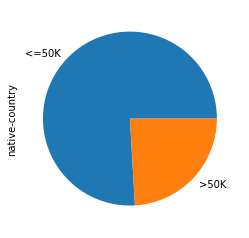

In [75]:
#P9_SOL
res = data.groupby("salary")["native-country"].count()
print(res)
res.plot.pie()

P10. Según el análisis: 
* ¿Qué campos serían idóneos para entrenar un modelo que predice si nuevos datos corresponden a <=50K o >50K?
* ¿Sería un modelo de regresión o clasificación - por qué?
* Argumentar en mínimo 3 párrafos.